First we need to get the data. We can use the Kaggle CLI (https://github.com/Kaggle/kaggle-api).

In [1]:
run(`pip install kaggle --quiet`)
run(`kaggle competitions download titanic --quiet`)
run(`unzip -qo titanic.zip`)

Process(`unzip -qo titanic.zip`, ProcessExited(0))

In [1]:
VERSION

v"1.4.1"

In [2]:
import Pkg

In [3]:
Pkg.add("BenchmarkTools")
Pkg.add("CSV");
Pkg.add("DataFrames");
Pkg.add("DataFramesMeta")
Pkg.add("Missings")
Pkg.add("FreqTables");
Pkg.add("GLM");
Pkg.add("Pipe");
Pkg.add("Plots");
Pkg.add("StatsBase")
Pkg.add("StatsPlots")
Pkg.add("JLBoost")
Pkg.add("XGBoost");
Pkg.add("LossFunctions")
Pkg.add("ReverseDiff");
Pkg.add("Zygote");

   Updating registry at `/opt/julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching: [==============>                          ]  32.6

    Fetching: [===========================>

    Fetching:

Fetching: [========================================>]  100.0 %

  Resolving package versions...
  Installed OpenSSL_jll ─ v1.1.1+3
  Installed Zlib_jll ──── v1.2.11+11
   Updating `/opt/julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `/opt/julia/environments/v1.4/Manifest.toml`
  [458c3c95] ↑ OpenSSL_jll v1.1.1+2 ⇒ v1.1.1+3
  [83775a58] ↑ Zlib_jll v1.2.11+10 ⇒ v1.2.11+11
  Resolving package versions...
   Updating `/opt/julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `/opt/julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `/opt/julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `/opt/julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `/opt/julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `/opt/julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `/opt/julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `/opt/julia/environments/v1.4/Manifest.to

In [4]:
# TODO: add propper missing values (keep dict, make col for missing, apply on test)
# TODO: Ian Ozwald T-SNE on errors plot
# TODO: proper pipes, the _ syntax is ugly


In [5]:
using CSV, DataFrames, Pipe, Plots, Statistics, StatsBase, XGBoost, Zygote

Plots.default(legend=false, alpha=0.4, size=(300,200))
ENV["COLUMNS"]=220   # force dataframe HTML rendering to many columns; 220 is terminal characters

df = CSV.read("train.csv");

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [6]:
first(df, 10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,Int64,String,String,Float64?,Int64,Int64,String,Float64,String?,String?
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S
6,6,0,3,"Moran, Mr. James",male,missing,0,0,330877,8.4583,missing,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,missing,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,missing,S


In [7]:
first(df, 5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,Int64,String,String,Float64?,Int64,Int64,String,Float64,String?,String?
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S


In [8]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,PassengerId,446.0,1,446.0,891,,,Int64
2,Survived,0.383838,0,0.0,1,,,Int64
3,Pclass,2.30864,1,3.0,3,,,Int64
4,Name,,"Abbing, Mr. Anthony",,"van Melkebeke, Mr. Philemon",891,,String
5,Sex,,female,,male,2,,String
6,Age,29.6991,0.42,28.0,80.0,,177,"Union{Missing, Float64}"
7,SibSp,0.523008,0,0.0,8,,,Int64
8,Parch,0.381594,0,0.0,6,,,Int64
9,Ticket,,110152,,WE/P 5735,681,,String


In [9]:
names(df)

12-element Array{String,1}:
 "PassengerId"
 "Survived"
 "Pclass"
 "Name"
 "Sex"
 "Age"
 "SibSp"
 "Parch"
 "Ticket"
 "Fare"
 "Cabin"
 "Embarked"

In [10]:
average_age = mean(skipmissing(df.Age))
df.Age = coalesce.(df.Age, average_age);   # coalesce replaces missing values

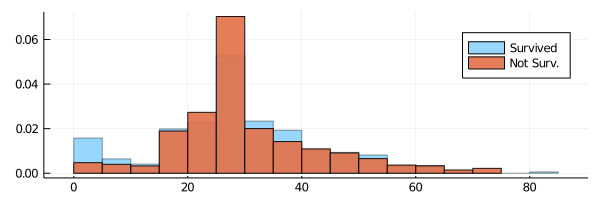

In [11]:
histogram(df[df.Survived.==1, :Age], normed=true, size=(600,200), legend=true, label="Survived")
histogram!(df[df.Survived.==0, :Age], alpha=0.9, normed=true, label="Not Surv.")

In [12]:
df.Embarked = coalesce.(df.Embarked, "S");

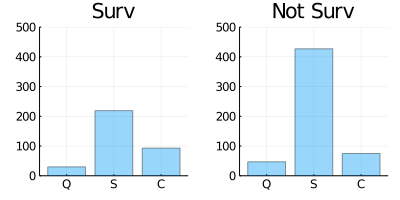

In [13]:
s = bar(countmap(df[df.Survived.==1, :Embarked]),)
ns = bar(countmap(df[df.Survived.==0, :Embarked]))
plot(s, ns, layout=2,  size=(400,200), title=["Surv" "Not Surv"], ylim=(0,500))

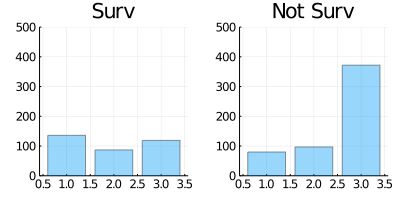

In [14]:
s = bar(countmap(df[df.Survived.==1, :Pclass]),)
ns = bar(countmap(df[df.Survived.==0, :Pclass]))
plot(s, ns, layout=2,  size=(400,200), title=["Surv" "Not Surv"], ylim=(0,500))

In [15]:
@pipe df |>
    groupby(_, :Survived) |>
    combine(_, :Fare => mean)

,Survived,Fare_mean
,Int64,Float64
1,0,22.1179
2,1,48.3954


In [16]:
first(df, 2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,Int64,String,String,Float64,Int64,Int64,String,Float64,String?,String
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C


In [17]:
# OHE the Pclass
for i in unique(df.Pclass)
    df[:,Symbol("Pclass_"*string(i))] = Int.(df.Pclass .== i)
end

In [18]:
# OHE the embarked
for i in unique(df.Embarked)
    df[:,Symbol("Embarked_"*string(i))] = Int.(df.Embarked .== i)
end

In [19]:
first(df, 5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_3,Pclass_1,Pclass_2,Embarked_S,Embarked_C,Embarked_Q
,Int64,Int64,Int64,String,String,Float64,Int64,Int64,String,Float64,String?,String,Int64,Int64,Int64,Int64,Int64,Int64
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S,1,0,0,1,0,0
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,1,0
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S,1,0,0,1,0,0
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S,0,1,0,1,0,0
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S,1,0,0,1,0,0


In [20]:
gender_dict = Dict("male"=>1, "female"=>0);
df.Sex = map(akey->gender_dict[akey], df.Sex);


In [21]:
cols = Not([
    :Survived,
    :Name,
    :PassengerId,
    :Pclass,
    :Ticket,
    :Cabin,
    :Embarked
])

InvertedIndex{Array{Symbol,1}}([:Survived, :Name, :PassengerId, :Pclass, :Ticket, :Cabin, :Embarked])

In [22]:
x_train = convert(Matrix{Float32}, select(df[1:800,:], cols));
y_train = convert(Array{Float32}, df[1:800,:Survived]);
x_val = convert(Matrix{Float32},select(df[801:end,:], cols));
y_val = convert(Array{Float32}, df[801:end,:Survived]);

In [23]:
train_dmat = DMatrix(x_train, label=y_train)

DMatrix(Ptr{Nothing} @0x0000000002d7cb60, XGBoost.var"#_setinfo#8"())

In [24]:
bst_base = xgboost(
    train_dmat,
    5,
    eta=0.3,
    objective="binary:logistic",
    eval_metric="auc"
)

[1]	train-auc:0.893250
[2]	train-auc:0.899080
[3]	train-auc:0.902066
[4]	train-auc:0.919524
[5]	train-auc:0.924863


Booster(Ptr{Nothing} @0x0000000007f291a0)

In [25]:
show(bst_base)

Booster(Ptr{Nothing} @0x0000000007f291a0)

In [26]:
imp = importance(bst_base)

10-element Vector{XGBoost.FeatureImportance}:
Gain      Coverage  Frequency  Feature
0.5279    0.1944    0.0394     f0
0.1355    0.2621    0.3701     f4
0.1350    0.0688    0.0394     f5
0.1010    0.2628    0.3307     f1
0.0427    0.1084    0.0394     f6
0.0408    0.0108    0.0630     f2
0.0105    0.0203    0.0472     f8
0.0053    0.0679    0.0472     f9
0.0009    0.0034    0.0157     f3
0.0005    0.0009    0.0079     f10


In [27]:
function plot_importances(booster, name_map=missing)
    imp = importance(booster)
    
    fnames = Vector{String}(undef, length(imp))
    gains = Vector{Float64}(undef, length(imp))
    coverages = Vector{Float64}(undef, length(imp))
    freqs = Vector{Float64}(undef, length(imp))
    
    for i in 1:length(imp)
        fnames[i] = imp[i].fname
        gains[i] = imp[i].gain
        coverages[i] = imp[i].cover
        freqs[i] = imp[i].freq
    end
    
    vars = [gains, coverages, freqs]
    names = ["Gain", "Coverage", "Frequency"]
    plots = [bar(reverse(fnames),
        reverse(vars[i]),
        orientation = :horizontal,
        title=names[i]) for i in 1:length(vars)]
    
    plot(plots..., layout=(1, 3), size=(600, 200))
    
end

plot_importances (generic function with 2 methods)

In [28]:
min(10,2)

2

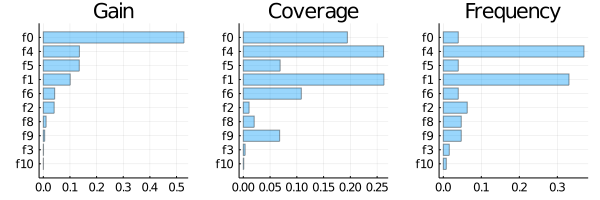

In [29]:
# TODO: put in the actual column names
# TODO: permutation importance
plot_importances(bst_base)

In [30]:
ŷ = XGBoost.predict(bst_base, x_val);

In [31]:
σ(x) = 1/(1+exp(-x))

σ (generic function with 1 method)

In [32]:
weighted_logistic_loss(x, y) = -1.5 .* y*log(σ(x)) - 1 .* (1-y)*log(1-σ(x))

weighted_logistic_loss (generic function with 1 method)

In [33]:
gradient_logistic(x, y) = gradient(weighted_logistic_loss,x,y)[1]

gradient_logistic (generic function with 1 method)

In [34]:
hess_logistic(x, y) = gradient(gradient_logistic,x,y)[1]

hess_logistic (generic function with 1 method)

In [35]:
function custom_objective(preds::Vector{Float32}, dtrain::DMatrix)
  y = get_info(dtrain, "label")
  grad = gradient_logistic.(preds, y)
  hess = hess_logistic.(preds, y)
  return grad, hess
end

custom_objective (generic function with 1 method)

In [36]:
bst = xgboost(train_dmat, 3, eta=0.3, eval_metric="auc", obj=custom_objective)

[1]	train-auc:0.892897
[2]	train-auc:0.899565
[3]	train-auc:0.912532


Booster(Ptr{Nothing} @0x000000000afb0dd0)

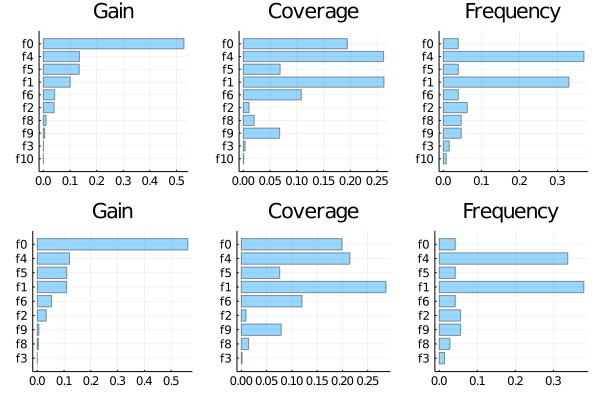

In [37]:
p = [plot_importances(bst_base), plot_importances(bst)]
plot(p..., layout=(2,1), size=(600, 400))

In [38]:
function evaluate(y, ŷ; threshold=0.5)
    out = zeros(Int64, 2, 2)
    ŷ = Int.(ŷ.>=threshold)
    out[1,1]=sum((y.==0).&(ŷ.==0))
    out[2,2]=sum((y.==1).&(ŷ.==1))
    out[2,1]=sum((y.==1).&(ŷ.==0))
    out[1,2]=sum((y.==0).&(ŷ.==1))
    r0 = out[1,1]/(out[1,1]+out[1,2])
    p0 = out[1,1]/(out[1,1]+out[2,1])
    f0 = 2*p0*r0/(p0+r0)
    r1 = out[2,2]/(out[2,2]+out[2,1])
    p1 = out[2,2]/(out[2,2]+out[1,2])
    f1 = 2*r1*p1/(p1+r1)
    println("Weighted f1 = ", round((sum(y .== 0.0)/length(y)) * f0 + (sum(y .== 1.0)/length(y)) * f1, digits=3))
    println("Accuracy =", (out[2,2]+out[1,1])/sum(out))
    out
end                    

evaluate (generic function with 1 method)

In [39]:
cm = evaluate(y_val, ŷ)

Weighted f1 = 0.856
Accuracy =0.8571428571428571


2×2 Array{Int64,2}:
 52   5
  8  26

# JLBoost

In [40]:
using JLBoost
using LossFunctions: L2DistLoss

In [47]:
names(df)

18-element Array{String,1}:
 "PassengerId"
 "Survived"
 "Pclass"
 "Name"
 "Sex"
 "Age"
 "SibSp"
 "Parch"
 "Ticket"
 "Fare"
 "Cabin"
 "Embarked"
 "Pclass_3"
 "Pclass_1"
 "Pclass_2"
 "Embarked_S"
 "Embarked_C"
 "Embarked_Q"

In [51]:
target = :Survived
features = ["Sex", "Age", "SibSp", "Parch", "Fare", "Pclass_3", "Pclass_1", "Pclass_2", "Embarked_S", "Embarked_C", "Embarked_Q"]

11-element Array{String,1}:
 "Sex"
 "Age"
 "SibSp"
 "Parch"
 "Fare"
 "Pclass_3"
 "Pclass_1"
 "Pclass_2"
 "Embarked_S"
 "Embarked_C"
 "Embarked_Q"

In [69]:
xgtreemodel = jlboost(df[1:800, :], target, features, nrounds=5, eta=0.3);

In [70]:
y_hat_j = JLBoost.predict(xgtreemodel, df[801:end, :])
cm = evaluate(y_val, y_hat_j)

Weighted f1 = 0.841
Accuracy =0.8461538461538461


2×2 Array{Int64,2}:
 54   3
 11  23

In [93]:
sort(unique(df.Embarked))

3-element Array{String,1}:
 "C"
 "Q"
 "S"

In [83]:
DataFrame(transpose(indicatormat(df.Embarked)))

,x1,x2,x3
,Bool,Bool,Bool
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
6,0,1,0
7,0,0,1
8,0,0,1
9,0,0,1


In [84]:
zz = [1;2;3;2;1]; zz .== sort(unique(zz))'

5×3 BitArray{2}:
 1  0  0
 0  1  0
 0  0  1
 0  1  0
 1  0  0

In [85]:
zz = [1;2;3;2;1];

In [86]:
zz

5-element Array{Int64,1}:
 1
 2
 3
 2
 1

In [89]:
sort(unique(zz))'

1×3 LinearAlgebra.Adjoint{Int64,Array{Int64,1}}:
 1  2  3

In [334]:
using XGBoost

X_train = rand(1_000_000, 5)
y = rand(1_000_000) .+ X_train[:, 1] .+ 0.5.*X_train[:, 2] .+ X_train[:,3] .* X_train[:, 4]
train_dmat = DMatrix(X_train, label=y)
@time booster = xgboost(train_dmat, 5, eta=0.1)

  1.978884 seconds (170 allocations: 7.609 KiB)


[1]	train-rmse:1.009410
[2]	train-rmse:0.918669
[3]	train-rmse:0.837795
[4]	train-rmse:0.765871
[5]	train-rmse:0.702026


Booster(Ptr{Nothing} @0x000000000df55550)

In [335]:
importance(booster)

4-element Vector{XGBoost.FeatureImportance}:
Gain      Coverage  Frequency  Feature
0.5716    0.3680    0.2032     f0
0.1510    0.2032    0.2667     f3
0.1503    0.2092    0.2794     f2
0.1270    0.2197    0.2508     f1


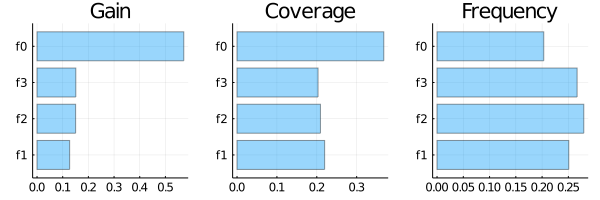

In [336]:
plot_importances(booster)

In [351]:
custom(x, y) = (x - y)^2
grad_custom_exact(x, y) = 2*(x-y)
hess_custom_exact(x, y) = 2

function my_obj_exact(preds::Vector{Float32}, dtrain::DMatrix)
    y = get_info(dtrain, "label")
    grad = grad_custom_exact.(preds, y)
    hess = hess_custom_exact.(preds, y)
    return grad, hess
end

@time xgboost(train_dmat, 5, eta=0.1, obj=my_obj_exact)

  2.038999 seconds (313.44 k allocations: 110.290 MiB, 0.49% gc time)


[1]	train-rmse:1.009406
[2]	train-rmse:0.918664
[3]	train-rmse:0.837787
[4]	train-rmse:0.765861
[5]	train-rmse:0.702015


Booster(Ptr{Nothing} @0x000000000f4a3200)

In [285]:
code_native(hess_custom_exact, (Float32, Float32))

	.text
; ┌ @ In[284]:3 within `hess_custom_exact'
	movl	$2, %eax
	retq
	nopw	%cs:(%rax,%rax)
; └


In [125]:
custom(x, y) = (x - y)^2
grad_custom(x, y) = gradient(custom, x, y)[1]
hess_custom(x, y) = gradient(grad_custom, x, y)[1]

function my_obj(preds::Vector{Float32}, dtrain::DMatrix)
    y = get_info(dtrain, "label")
    grad = grad_custom.(preds, y)
    hess = hess_custom.(preds, y)
    return grad, hess
end

my_obj (generic function with 1 method)

In [356]:
#code_native(hess_custom, (Float32, Float32))

In [357]:
@time xgboost(train_dmat, 5, eta=0.1, obj=my_obj)

[1]	train-rmse:1.009406
[2]	train-rmse:0.918664
[3]	train-rmse:0.837787


InterruptException: InterruptException:

In [250]:
df = DataFrame(a=[1, 2, missing])

,a
,Int64?
1,1
2,2
3,missing


In [215]:
df[Not(ismissing.(df.a)), :]

,a
,Int64?
1,1
2,2


In [198]:
df[completecases(df), :]

,a
,Int64?
1,1
2,2


In [213]:
ismissing.(df.a)

3-element BitArray{1}:
 0
 0
 1

In [211]:
df:a

UndefVarError: UndefVarError: a not defined

In [338]:
y = rand(100_000)
y_hat = rand(100_000);

In [343]:
@benchmark grad_custom_exact.(y, y_hat)


BenchmarkTools.Trial: 
  memory estimate:  781.38 KiB
  allocs estimate:  4
  --------------
  minimum time:     128.296 μs (0.00% GC)
  median time:      133.897 μs (0.00% GC)
  mean time:        183.043 μs (26.19% GC)
  maximum time:     7.712 ms (97.72% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [344]:
@benchmark grad_custom.(y, y_hat)

BenchmarkTools.Trial: 
  memory estimate:  781.38 KiB
  allocs estimate:  4
  --------------
  minimum time:     129.203 μs (0.00% GC)
  median time:      133.967 μs (0.00% GC)
  mean time:        182.985 μs (26.17% GC)
  maximum time:     7.408 ms (97.83% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [345]:
@benchmark hess_custom_exact.(y, y_hat)


BenchmarkTools.Trial: 
  memory estimate:  781.38 KiB
  allocs estimate:  4
  --------------
  minimum time:     87.775 μs (0.00% GC)
  median time:      92.743 μs (0.00% GC)
  mean time:        141.991 μs (33.71% GC)
  maximum time:     7.674 ms (98.34% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [346]:
@benchmark hess_custom.(y, y_hat)

BenchmarkTools.Trial: 
  memory estimate:  682.82 MiB
  allocs estimate:  29099498
  --------------
  minimum time:     7.419 s (1.50% GC)
  median time:      7.419 s (1.50% GC)
  mean time:        7.419 s (1.50% GC)
  maximum time:     7.419 s (1.50% GC)
  --------------
  samples:          1
  evals/sample:     1

In [327]:
using BenchmarkTools

┌ Info: Precompiling BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]
└ @ Base loading.jl:1260


In [358]:
using ReverseDiff

┌ Info: Precompiling ReverseDiff [37e2e3b7-166d-5795-8a7a-e32c996b4267]
└ @ Base loading.jl:1260


In [ ]:
custom(x, y) = (x - y)^2


In [149]:
grad_custom_exact(x, y) = 2*(x-y)
hess_custom_exact(x, y) = 2

function my_obj_exact(preds::Vector{Float32}, dtrain::DMatrix)
    y = get_info(dtrain, "label")
    grad = grad_custom_exact.(preds, y)
    hess = hess_custom_exact.(preds, y)
    return grad, hess
end

@time xgboost(train_dmat, 5, eta=0.1, obj=my_obj_exact)

  0.278026 seconds (606.18 k allocations: 30.590 MiB, 12.34% gc time)


[1]	train-rmse:0.470377
[2]	train-rmse:0.445263
[3]	train-rmse:0.423163
[4]	train-rmse:0.402871
[5]	train-rmse:0.386671


Booster(Ptr{Nothing} @0x000000000fb0e810)

In [76]:
using BenchmarkTools, ReverseDiff

# Using ReverseDiff

In [105]:
n=1
function f(x)
    return x[1]*x[1]
end

f (generic function with 1 method)

In [106]:
@btime f(x) setup=(x = rand(n))

  15.288 ns (1 allocation: 16 bytes)


0.8279676741358949

In [107]:
@btime ReverseDiff.gradient(f, x) setup=(x = rand(n));

  640.482 ns (16 allocations: 816 bytes)


In [108]:
tape = ReverseDiff.compile(ReverseDiff.GradientTape(f, rand(n)));

In [109]:
tape

ReverseDiff.CompiledTape(f)

In [110]:
@btime ReverseDiff.gradient!(g, $tape, x) setup=(x = rand(n); g = similar(x));

  100.704 ns (2 allocations: 32 bytes)


In [112]:
g = zeros(1)
ReverseDiff.gradient!(g, tape, rand(1));

In [161]:
custom(rand(1)[1] , rand(1)[1])

0.0026346191f0

In [167]:
using ReverseDiff

custom(x, y) = (x[1] - y[1])^2
const tape = ReverseDiff.compile(ReverseDiff.GradientTape(custom, (rand(1), rand(1))));
g = zeros(1)
ReverseDiff.gradient!(tape, (rand(1), rand(1)))[1][1]

ErrorException: cannot declare tape constant; it already has a value

In [164]:
using ReverseDiff, Zygote

custom(x, y)::Float32 = (x[1] - y[1])^2
grad_custom(x, y) = gradient(custom, x, y)[1]

const tape_h = ReverseDiff.compile(ReverseDiff.GradientTape(grad_custom, (rand(1), rand(1))));

hess_custom_rd(x, y) = Float32(ReverseDiff.gradient!(tape_h, ([x], [y]))[1][1])

hess_custom_rd(1.,1.)

2.0f0

In [166]:
function my_obj_exact(preds::Vector{Float32}, dtrain::DMatrix)
    y = get_info(dtrain, "label")
    grad = grad_custom.(preds, y)
    hess = hess_custom_rd.(preds, y)
    return grad, hess
end

@time xgboost(train_dmat, 5, eta=0.1, obj=my_obj_exact)

  0.115570 seconds (444.84 k allocations: 16.606 MiB)


[1]	train-rmse:0.470377
[2]	train-rmse:0.445263
[3]	train-rmse:0.423163
[4]	train-rmse:0.402871
[5]	train-rmse:0.386671


Booster(Ptr{Nothing} @0x000000001216c9b0)

1-element Array{Float64,1}:
 2.0

In [119]:
?ReverseDiff.gradient!

```
ReverseDiff.gradient!(result, f, input, cfg::GradientConfig = GradientConfig(input))
```

Returns `result`. This method is exactly like `ReverseDiff.gradient(f, input, cfg)`, except it stores the resulting gradient(s) in `result` rather than allocating new memory.

`result` can be an `AbstractArray` or a `Tuple` of `AbstractArray`s. The `result` (or any of its elements, if `isa(result, Tuple)`), can also be a `DiffResults.DiffResult`, in which case the primal value `f(input)` (or `f(input...)`, if `isa(input, Tuple)`) will be stored in it as well.

---

```
ReverseDiff.gradient!(tape::Union{GradientTape,CompiledGradient}, input)
```

If `input` is an `AbstractArray`, assume `tape` represents a function of the form `f(::AbstractArray)::Real` and return `∇f(input)`.

If `input` is a tuple of `AbstractArray`s, assume `tape` represents a function of the form `f(::AbstractArray...)::Real` and return a `Tuple` where the `i`th element is the gradient of `f` w.r.t. `input[i].`

---

```
ReverseDiff.gradient!(result, tape::Union{GradientTape,CompiledGradient}, input)
```

Returns `result`. This method is exactly like `ReverseDiff.gradient!(tape, input)`, except it stores the resulting gradient(s) in `result` rather than allocating new memory.

`result` can be an `AbstractArray` or a `Tuple` of `AbstractArray`s. The `result` (or any of its elements, if `isa(result, Tuple)`), can also be a `DiffResults.DiffResult`, in which case the primal value `f(input)` (or `f(input...)`, if `isa(input, Tuple)`) will be stored in it as well.


MethodError: MethodError: no method matching extract_result!(::Array{Float64,1}, ::ReverseDiff.TrackedReal{Float64,Float64,Nothing}, ::Tuple{ReverseDiff.TrackedArray{Float64,Float64,1,Array{Float64,1},Array{Float64,1}},ReverseDiff.TrackedArray{Float64,Float64,1,Array{Float64,1},Array{Float64,1}}})
Closest candidates are:
  extract_result!(!Matched::Tuple, ::Any, ::Tuple) at /opt/julia/packages/ReverseDiff/uy0uk/src/api/utils.jl:78
  extract_result!(::AbstractArray, ::ReverseDiff.TrackedReal, !Matched::ReverseDiff.TrackedArray) at /opt/julia/packages/ReverseDiff/uy0uk/src/api/utils.jl:92
  extract_result!(::AbstractArray, ::Number) at /opt/julia/packages/ReverseDiff/uy0uk/src/api/utils.jl:103
  ...

In [104]:
?ReverseDiff.gradient!

```
ReverseDiff.gradient!(result, f, input, cfg::GradientConfig = GradientConfig(input))
```

Returns `result`. This method is exactly like `ReverseDiff.gradient(f, input, cfg)`, except it stores the resulting gradient(s) in `result` rather than allocating new memory.

`result` can be an `AbstractArray` or a `Tuple` of `AbstractArray`s. The `result` (or any of its elements, if `isa(result, Tuple)`), can also be a `DiffResults.DiffResult`, in which case the primal value `f(input)` (or `f(input...)`, if `isa(input, Tuple)`) will be stored in it as well.

---

```
ReverseDiff.gradient!(tape::Union{GradientTape,CompiledGradient}, input)
```

If `input` is an `AbstractArray`, assume `tape` represents a function of the form `f(::AbstractArray)::Real` and return `∇f(input)`.

If `input` is a tuple of `AbstractArray`s, assume `tape` represents a function of the form `f(::AbstractArray...)::Real` and return a `Tuple` where the `i`th element is the gradient of `f` w.r.t. `input[i].`

---

```
ReverseDiff.gradient!(result, tape::Union{GradientTape,CompiledGradient}, input)
```

Returns `result`. This method is exactly like `ReverseDiff.gradient!(tape, input)`, except it stores the resulting gradient(s) in `result` rather than allocating new memory.

`result` can be an `AbstractArray` or a `Tuple` of `AbstractArray`s. The `result` (or any of its elements, if `isa(result, Tuple)`), can also be a `DiffResults.DiffResult`, in which case the primal value `f(input)` (or `f(input...)`, if `isa(input, Tuple)`) will be stored in it as well.


In [422]:
?ReverseDiff.gradient


```
ReverseDiff.gradient(f, input, cfg::GradientConfig = GradientConfig(input))
```

If `input` is an `AbstractArray`, assume `f` has the form `f(::AbstractArray{<:Real})::Real` and return `∇f(input)`.

If `input` is a tuple of `AbstractArray`s, assume `f` has the form `f(::AbstractArray{<:Real}...)::Real` (such that it can be called as `f(input...)`) and return a `Tuple` where the `i`th element is the gradient of `f` w.r.t. `input[i].`

Note that `cfg` can be preallocated and reused for subsequent calls.

If possible, it is highly recommended to use `ReverseDiff.GradientTape` to prerecord `f`. Otherwise, this method will have to re-record `f`'s execution trace for every subsequent call.
